In [ ]:
from google.colab import auth

In [ ]:
import gspread

In [ ]:
from google.auth import default

In [ ]:
import pandas as pd

In [ ]:
auth.authenticate_user()

In [ ]:
creds, _ = default()
gc = gspread.authorize(creds)

worksheet = gc.open('DL').sheet1

rows = worksheet.get_all_values()

In [ ]:
df = pd.DataFrame(rows[1:], columns=rows[0])
df1 = df.astype({'ip':'int','op':'int'})
df1.head()

,ip,op
0,1,11
1,2,22
2,3,33
3,4,44
4,5,55


In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
X = df1[["ip"]].values
y = df1[["op"]].values

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.33,random_state=33)

In [ ]:
Scaler = MinMaxScaler()

In [ ]:
Scaler.fit(xtrain)

MinMaxScaler()

In [ ]:
xtrain1 = Scaler.transform(xtrain)

In [ ]:
AiBrain = Sequential([
    Dense(8,activation = 'relu'),
    Dense(10,activation = 'relu'),
    Dense(1)
])

In [ ]:
AiBrain.compile(optimizer = 'rmsprop',loss = 'mse')

In [ ]:
AiBrain.fit(xtrain1,ytrain,epochs = 2000)

Epoch 1/2000
1/1 [==============================] - 1s 595ms/step - loss: 2809.8904
Epoch 2/2000
1/1 [==============================] - 0s 7ms/step - loss: 2808.3010
Epoch 3/2000
1/1 [==============================] - 0s 8ms/step - loss: 2807.1716
Epoch 4/2000
1/1 [==============================] - 0s 9ms/step - loss: 2806.2820
Epoch 5/2000
1/1 [==============================] - 0s 9ms/step - loss: 2805.4890
Epoch 6/2000
1/1 [==============================] - 0s 7ms/step - loss: 2804.7786
Epoch 7/2000
1/1 [==============================] - 0s 9ms/step - loss: 2804.1370
Epoch 8/2000
1/1 [==============================] - 0s 11ms/step - loss: 2803.4958
Epoch 9/2000
1/1 [==============================] - 0s 8ms/step - loss: 2802.8984
Epoch 10/2000
1/1 [==============================] - 0s 10ms/step - loss: 2802.3918
Epoch 11/2000
1/1 [==============================] - 0s 7ms/step - loss: 2801.9241
Epoch 12/2000
1/1 [==============================] - 0s 8ms/step - loss: 2801.4941
Epoch 13/

In [ ]:
loss_df = pd.DataFrame(AiBrain.history.history)

<AxesSubplot:>

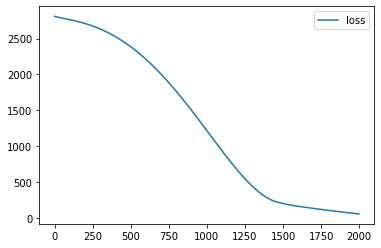

In [ ]:
loss_df.plot()

In [ ]:
xtest1 = Scaler.transform(xtest)

In [ ]:
AiBrain.evaluate(xtest1,ytest)

1/1 [==============================] - 0s 118ms/step - loss: 3067.9102


3067.91015625

In [ ]:
xn1 = [[10]]

In [ ]:
xn1_1 = Scaler.transform(xn1)

In [ ]:
AiBrain.predict(xn1_1)

1/1 [==============================] - 0s 121ms/step


array([[95.478096]], dtype=float32)